In [1]:
from draw_MR import *
from degreeAnalysis import *
import networkx as NX

% matplotlib inline

The script `Exercise_B5B6.py` only generates the text files for plotting. The plotting is done in this notebook.

# Run all the analysis for all the 5 graphs

To avoid that the output looks too messy, I stored all the variable in dictionary and can be reached using the title name.

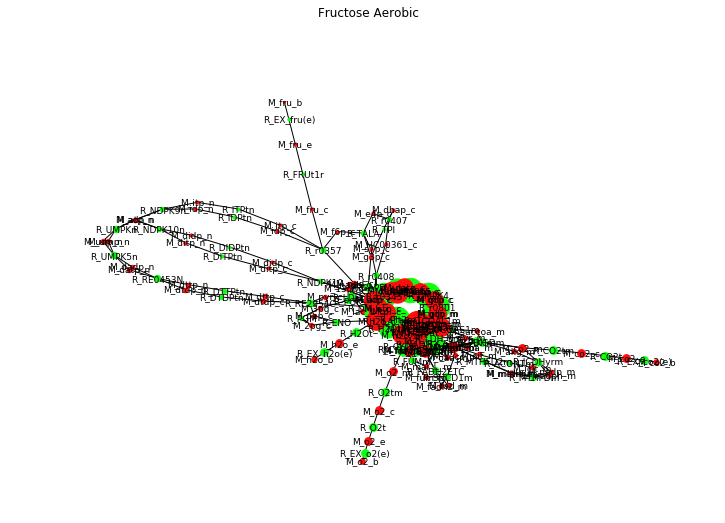

# Degree analysis


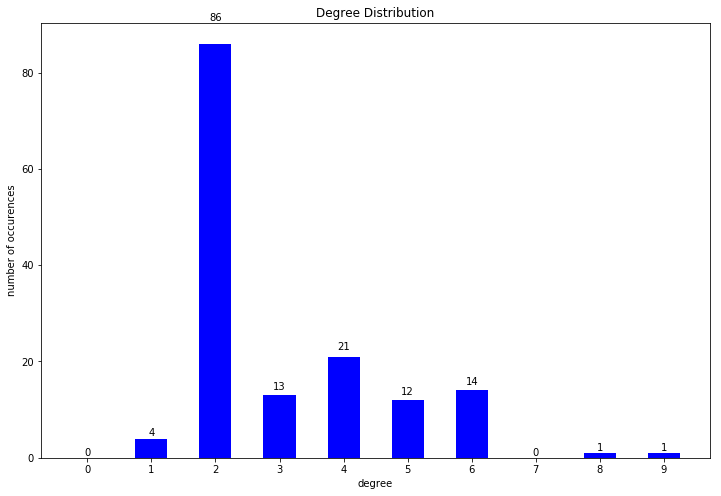

Average degree 3.02631578947
variance: 2.35457063712
Node M_h_m has the greatest degree: 9

# Compartment Analysis


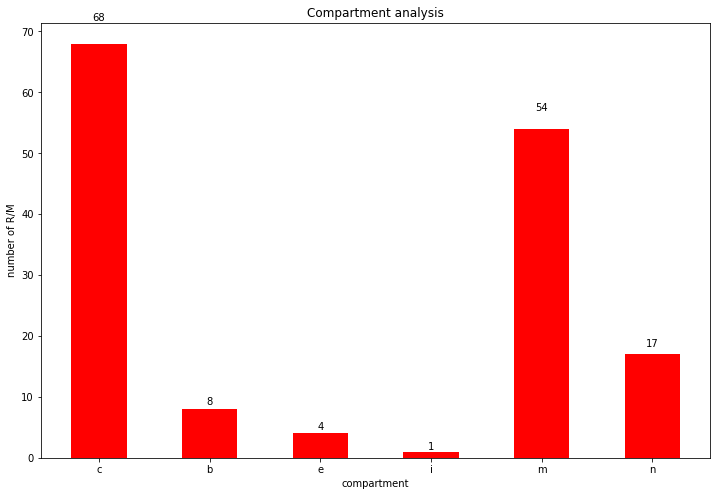

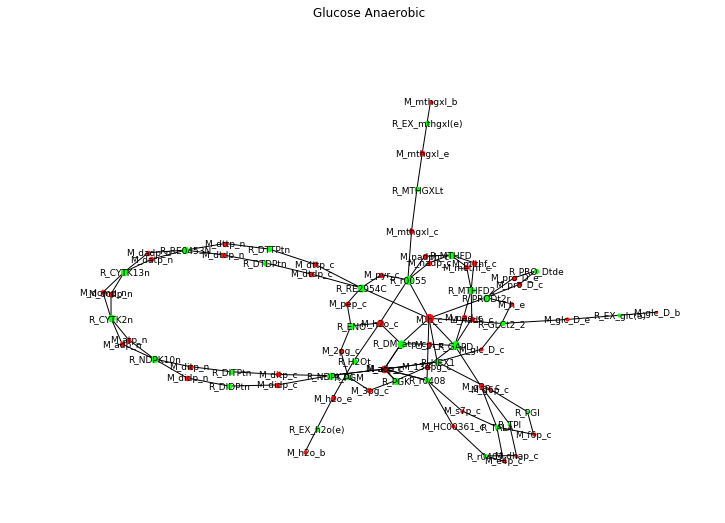

# Degree analysis


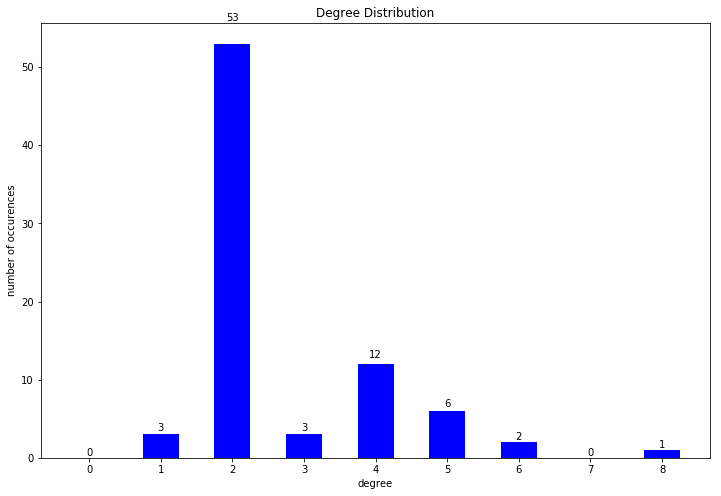

Average degree 2.7
variance: 1.71
Node M_h_c has the greatest degree: 8

# Compartment Analysis


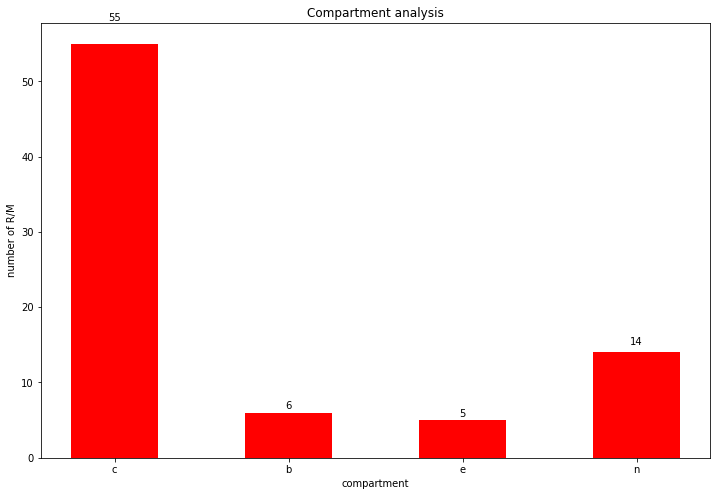

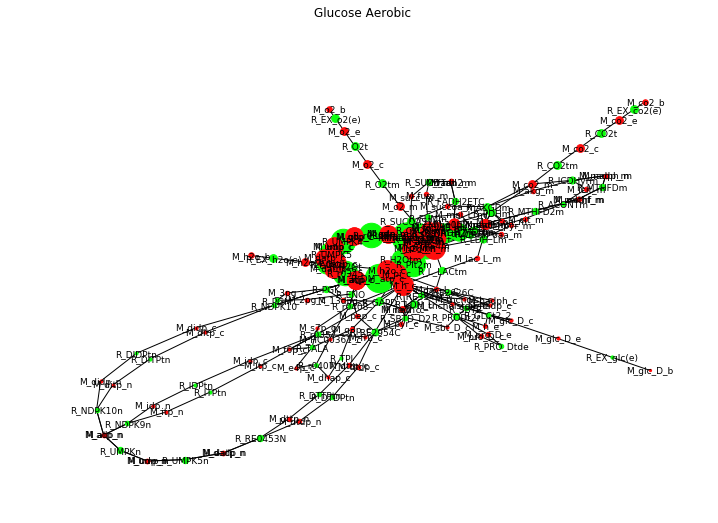

# Degree analysis


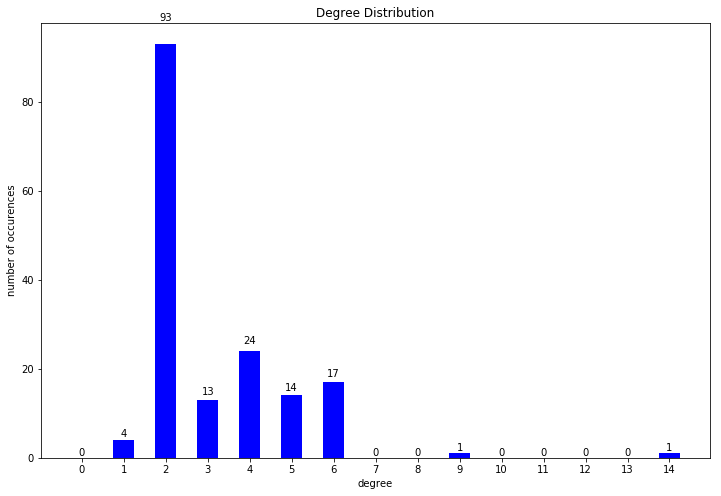

Average degree 3.11377245509
variance: 2.97507978056
Node M_h_c has the greatest degree: 14

# Compartment Analysis


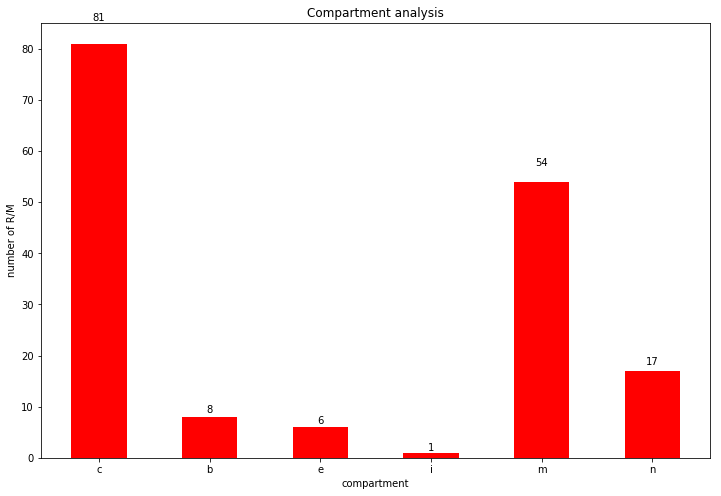

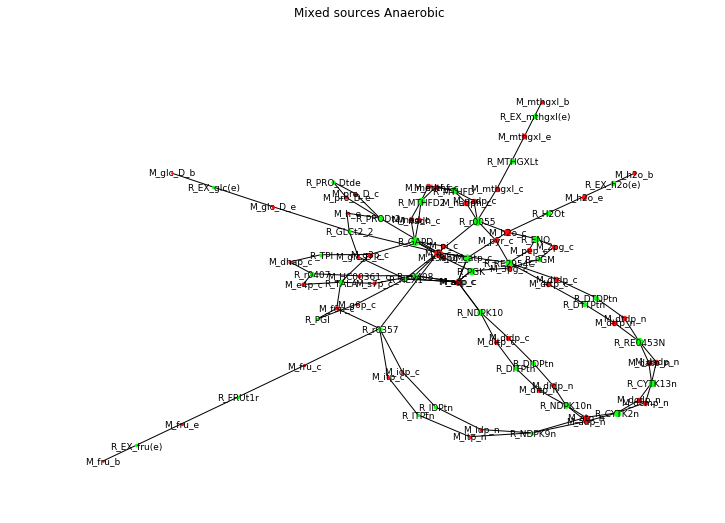

# Degree analysis


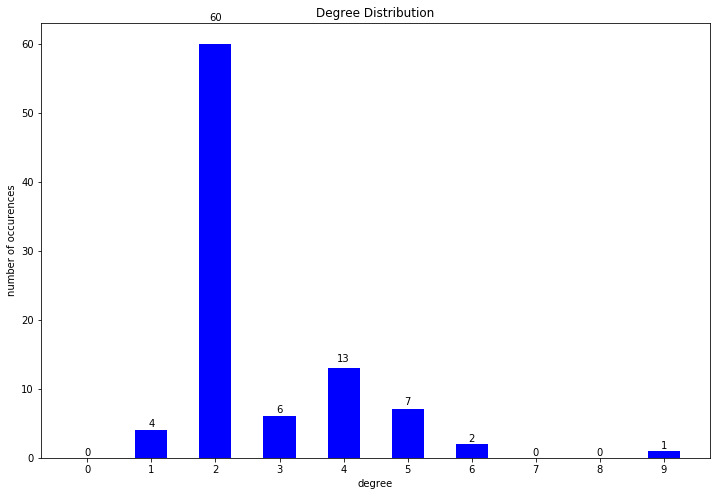

Average degree 2.68817204301
variance: 1.74147300266
Node M_h_c has the greatest degree: 9

# Compartment Analysis


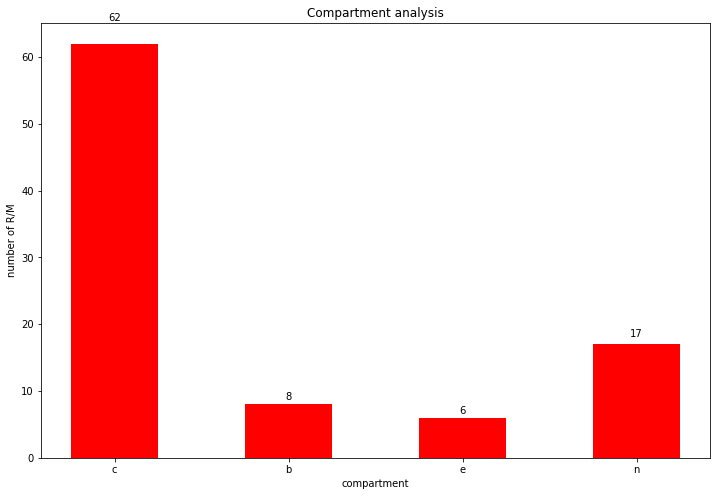

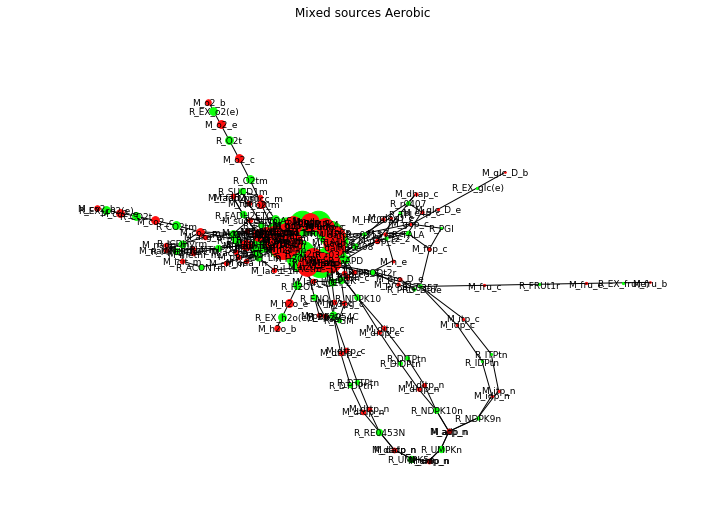

# Degree analysis


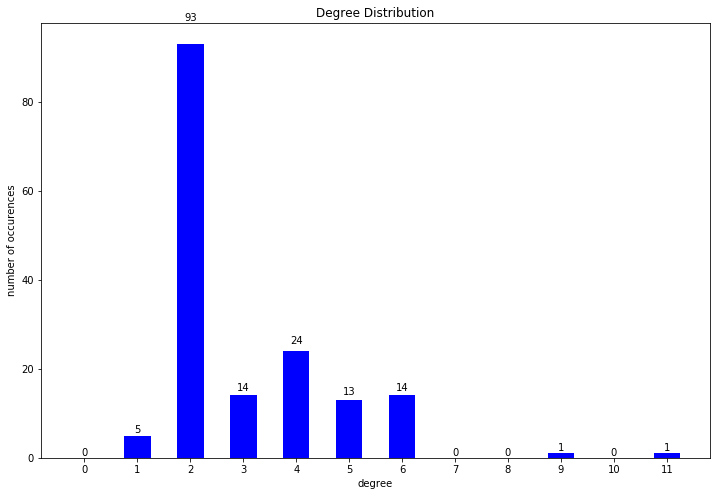

Average degree 3.01818181818
variance: 2.51482093664
Node M_h_c has the greatest degree: 11

# Compartment Analysis


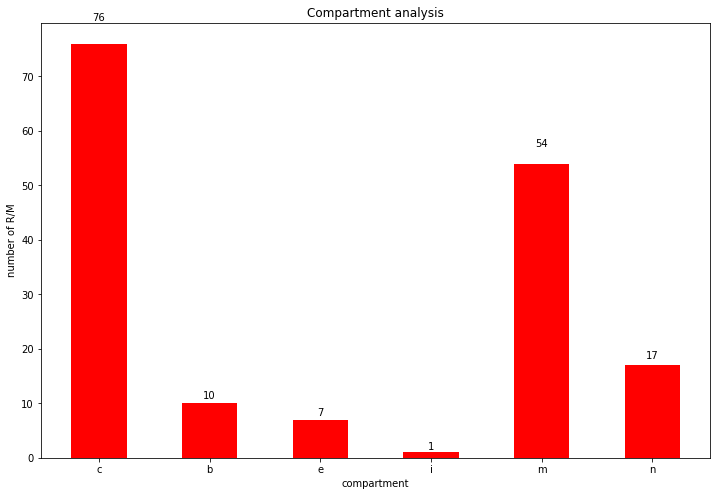

In [2]:
txtpaths = [
            # exercise B.5
            {'path':'EX_fru(e)True.txt', 'title':'Fructose Aerobic'},
            {'path':'EX_glc(e)False.txt', 'title':'Glucose Anaerobic'},
            {'path':'EX_glc(e)True.txt', 'title':'Glucose Aerobic'},
            # exercise B.6
            {'path':'EX_glc(e)EX_fru(e)False.txt', 'title':'Mixed sources Anaerobic'},
            {'path':'EX_glc(e)EX_fru(e)True.txt', 'title':'Mixed sources Aerobic'}
           ]

dist_weighted = {}
dist_unweighted = {}
nx_weighted = {}
nx_unweighted = {}
degree_distr = {}
freq_table = {}

for d in txtpaths:
    # print "# R/M graph'"
    nl, el = read_MR_txt('graphtxt/' + d['path'])
    G = draw_MR_Graph(nl, el, title=d['title'])
    
    d1 = my_dijkstra('R_DM_atp_c_', G, weight='weight')
    d2 = my_dijkstra('R_DM_atp_c_', G, weight=1)
    dist_weighted[d['title']] = d1
    dist_unweighted[d['title']] = d2
    
    d3 = {}
    d4 = {}
    for node in G.nodes():
        d3[node] = NX.algorithms.dijkstra_path_length(G, "R_DM_atp_c_", node)
        d4[node] = NX.algorithms.dijkstra_path_length(G, "R_DM_atp_c_", node, weight=1)
    nx_weighted[d['title']] = d3
    nx_unweighted[d['title']] = d4
    
    print '# Degree analysis'
    degree_distr[d['title']] = degree_stats(G)
    
    print ''
    print "# Compartment Analysis"
    freq_table[d['title']] = compartment_analysis(G)
    node_num = 0    

# Shortest path

Verify that `my_dijkstra` give the correct answer by comparing its answer with that of `nx.algorithms.dijkstra_path_length`.

No output means all the distance calculated by `my_dijkstra` is the same as `networkx` module.

In [3]:
for d in txtpaths:
    title = d['title']
    d1 = dist_weighted[title]
    d2 = dist_unweighted[title]
    d3 = nx_weighted[title]
    d4 = nx_unweighted[title]

    for n in d1.keys():
        if d1[n] != d3[n] or d2[n] != d4[n]:
            print 'Error in node', n

# Report for Exercise B.5

1. From the degree analysis histogram, we can see that no matter aerobic or not, the number of nodes with degree of 2 is always the largest. And H is always the hub of the graphs. The difference is that in anaerobic condition, H is `M_h_c` (cytoplasm) while sometimes in aerobic condition, H can be `M_h_m` (mitochondrion). From compartment analysis plot, in aerobic condition, a lot more reaction and metabolites resides in mitochondrion, but in anaerobic condition **no** reaction or metabolites resides in compartment mitochondrion at all. This is consistent with the fact that aerobic respiratory happens in mitochondrions. Of course, the flux of atp is much higher in aerobic condition than anaerobic condition, 1600 compared with 100.

2. The number of different compartments is more in aerobic condition than anaerobic condition. 

    - anaerobic: {'c','b','e','n'}
    - aerobic:   {'c','b','e','i','m','n'}

3. There are about 150 nodes (reactions and metabolites) in aerobic condition, much more than 100 of anaerobic condition.

4. From the result of my simulation, the flux of `DM_atp_c_` is the same for glucose and fructose. This can be explained by that glucose and fructose have the same component C6H12O6. Hence, same flux of them can generate the same amount of atp. (?)

5. Methylgloxal is produced as end-product only under anaerobic condition.

    - EX_fru(e) False (Exercise 1)
    - EX_glc(e) False
    
6. The variance of degree in anaerobic condition is less that aerobic condition.

7. The average degree in aerobic condition tends to be more than anaerobic condition.
    
8. The weighted distances in aerobic condition are generally greater than 1000 but in anaerobic condition most of the weighted distances are less than 600. For unweighted distance, aerobic and anaerobic are basically the same.

> (?) One mole of glucose needs to consume 2 moles of atp to be converted into fructose before respiration reaction. Hence, I feel confused why glucose and fructose can generate the same flux of `R_DM_atp_c_`. But I couldn't find the mistake in my program.

# Report for Exercise B.6

For mixed input, all the findings in B.5 are still true.

1. Degree analysis: aerobic condition has greater variance and average degree.

    - Mixed input anaerobic:
        - Average degree 2.68817204301
        - variance: 1.74147300266
        - Node M_h_c has the greatest degree: 9

    - Mixed input aerobic:
        - Average degree 3.01818181818
        - variance: 2.51482093664
        - Node M_h_c has the greatest degree: 11
        
2. Aerobic has 2 more compartment than anaerobic.

3. Aerobic has greater weighted distance than anaerobic. Unweighted distance doesn't have much difference for these two conditions.

3. Methylgloxal is generated as end-product in `EX_glc(e)EX_fru(e)False`.